**Question 7: Is there a correlation between persons fully vaccinated per 100 and deaths per 100,000 population?**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [10]:
cases_df = pd.read_csv('../../dataset/WHO-COVID-19-global-table-data.csv',index_col=False)
vacc_df = pd.read_csv('../../dataset/Vaccination-data.csv',index_col=False)

In [11]:
# Merge the vaccination and cases datasets on the country name
# Use an inner join to keep only countries present in both datasets
# Fill any missing values with 0 to ensure valid numeric calculations
merged = pd.merge(
    vacc_df,
    cases_df,
    left_on='COUNTRY',
    right_on='Name',
    how='inner'
).fillna(0)

In [12]:
# Define the x and y variables for correlation
x = merged['PERSONS_FULLY_VACCINATED_PER100'] # percentage of fully vaccinated population per 100 people
y = merged['Deaths - cumulative total per 100000 population'] # cumulative deaths per 100,000 population

In [13]:
# Perform linear regression to quantify the correlation between vaccination and deaths
slope, intercept, r, p, std = linregress(x, y)

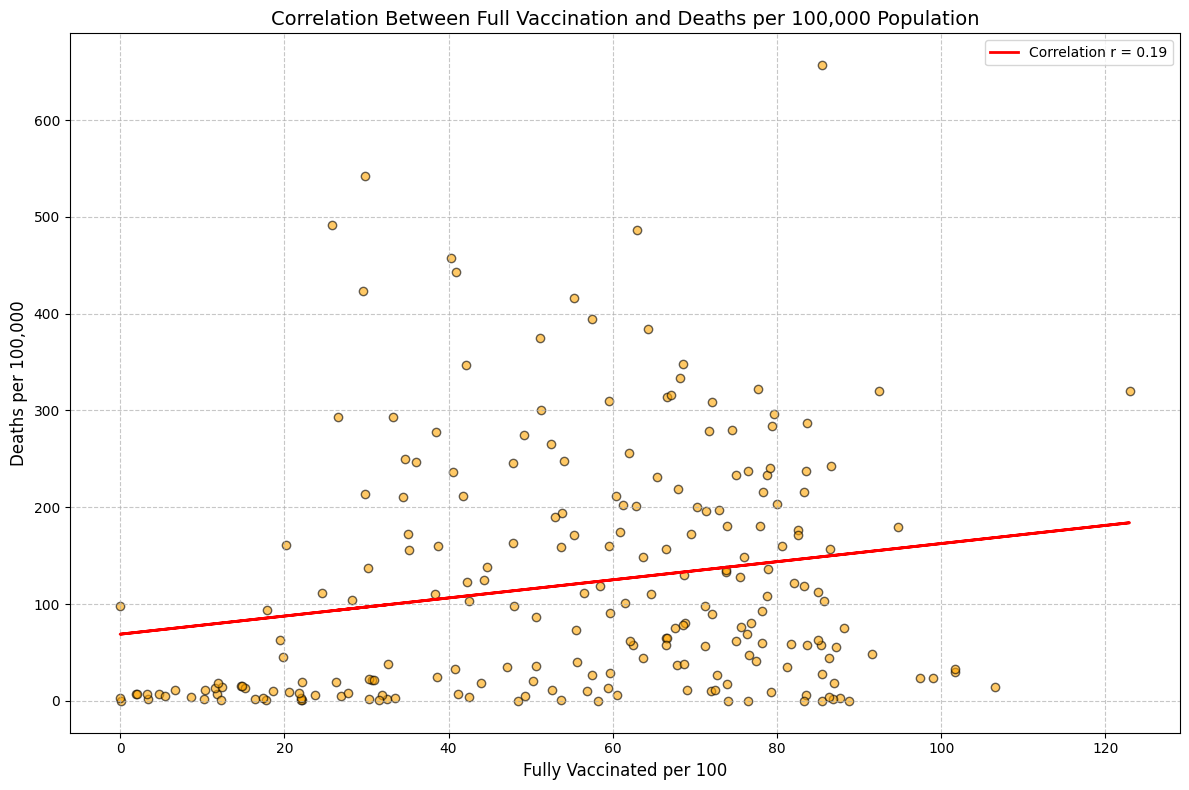

In [14]:
# Initialize the figure with specified size
plt.figure(figsize=(12, 8))
# Create a scatter plot of fully vaccinated population vs deaths per 100,000

# Points are colored orange with black edges and semi-transparent for readability
plt.scatter(x, y, color='orange', alpha=0.6, edgecolor='black')
# Plot the regression line in red and display the correlation coefficient in the legend
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label=f'Correlation r = {r:.2f}')

# Label the axes and add titles
plt.xlabel('Fully Vaccinated per 100', fontsize=12)
plt.ylabel('Deaths per 100,000', fontsize=12)
plt.title('Correlation Between Full Vaccination and Deaths per 100,000 Population', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
# Display the chart and saving the chart
plt.tight_layout()
plt.savefig('Correlation Between Full Vaccination and Deaths per 100,000 Population.png')
plt.show()
plt.close()

/var/folders/yx/tzrmnhxs6n1_fk0v9gg91w0m0000gn/T/ipykernel_27922/3757537765.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=merged['PERSONS_FULLY_VACCINATED_PER100'], y=merged['Deaths - cumulative total per 100000 population'], cmap='Oranges', shade=True, bw_adjust=0.5)


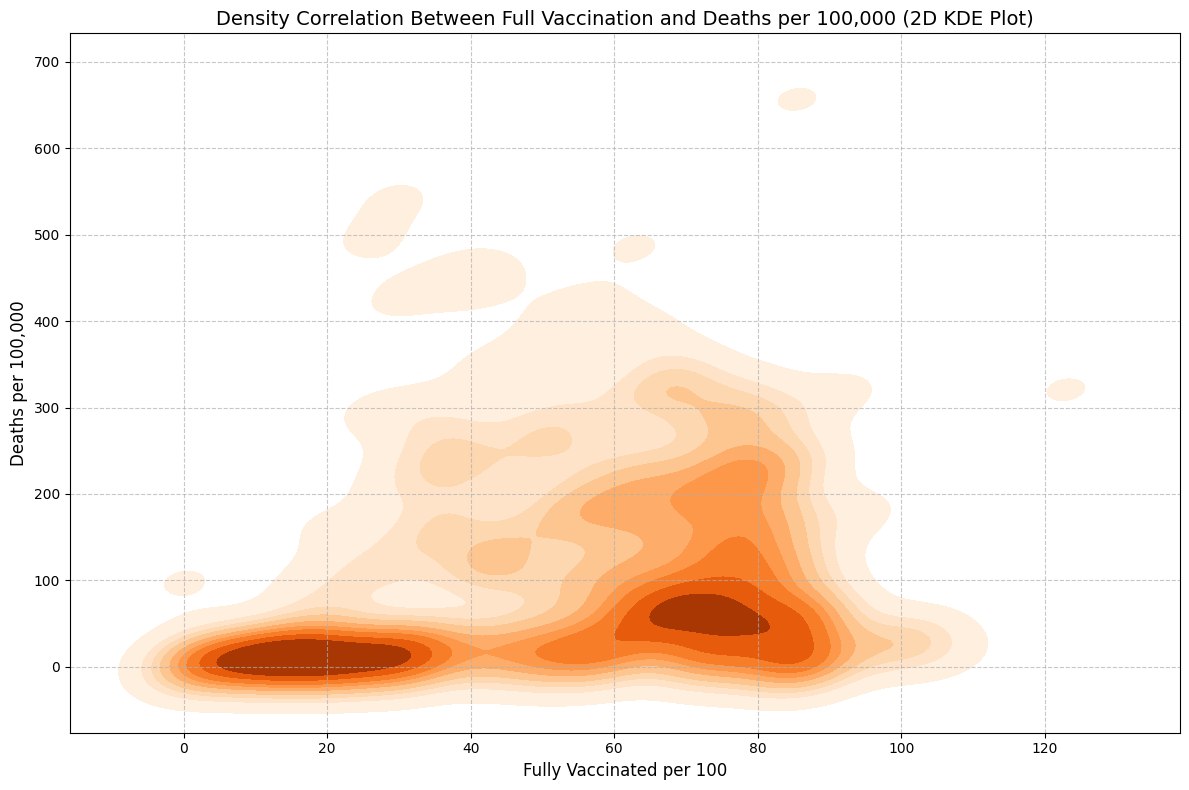

In [15]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=merged['PERSONS_FULLY_VACCINATED_PER100'], y=merged['Deaths - cumulative total per 100000 population'], cmap='Oranges', shade=True, bw_adjust=0.5)
plt.xlabel('Fully Vaccinated per 100', fontsize=12)
plt.ylabel('Deaths per 100,000', fontsize=12)
plt.title('Density Correlation Between Full Vaccination and Deaths per 100,000 (2D KDE Plot)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('alt_plot7.png')
plt.show()
plt.close()